# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

# **Mount Database From Google Drive**

In [ ]:
from google.colab import drive   # mount drive in google colab
drive.mount('/content/drive')

Mounted at /content/drive


# **Upload File in Google Colab**

In [ ]:
file_path='/content/drive/MyDrive/dataset/merged_medical_data.csv'  # upload database
df = pd.read_csv(file_path)   # Read file using pandas
df

,Gender,Disease,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,Female,Healthy,126.133433,135.697821,17.223487,413126.659043,9633.481003,4.308518,40.112301,96.647243,...,102.038729,4.262777,94.413633,50.442121,15.021353,11.581306,74.124497,1.192936,0.030856,1.596364
1,Male,Liver Disease,73.076612,172.129506,14.380013,231268.420207,7935.663167,4.640516,40.330323,96.490459,...,56.520280,4.520946,76.787424,57.526713,73.418336,45.925814,81.824868,0.858017,0.013965,8.376125
2,Male,Liver Disease,88.990913,134.445934,14.007950,187658.874598,4738.452192,4.783822,48.188792,99.837856,...,147.221341,5.662226,96.326715,48.354164,43.857592,74.892397,72.178234,0.662849,0.013128,8.923041
3,Male,Hypercholesterolemia,81.433721,211.139585,15.633140,305052.014174,5007.593726,4.782938,48.181803,99.202799,...,159.887170,4.283218,197.321307,26.534159,17.922907,23.583538,92.310347,1.087095,0.027800,0.619570
4,Male,Liver Disease,78.649430,127.499634,17.116293,256392.808544,9380.790272,4.556660,50.100075,99.339765,...,86.092050,5.111424,107.699464,49.603548,54.851907,51.221055,78.347281,0.940594,0.029538,11.769606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349147,Male,Diabetes & Thalassemia & Anemia & Thrombocytop...,195.429648,283.571617,6.774627,90910.494038,5895.710504,3.301981,31.125314,68.959258,...,153.236683,8.434946,156.350440,32.855673,43.267858,51.551276,92.303219,3.949515,6.246726,9.184126
349148,Female,Diabetes & Thalassemia & Anemia & Thrombocytop...,192.904533,241.271032,7.459403,91886.849596,7423.406474,3.993353,34.686714,63.084707,...,202.124608,7.483220,138.705103,20.355824,46.100786,54.871108,100.319396,4.250698,9.767200,4.024387
349149,Female,Diabetes & Thalassemia & Anemia & Thrombocytop...,153.460912,248.549461,6.685512,105112.286240,8376.210372,3.192933,33.157727,67.634913,...,176.486043,11.893319,176.264933,20.965457,32.989377,39.858546,94.365884,1.976259,1.533946,3.546476
349150,Female,Diabetes & Thalassemia & Anemia & Thrombocytop...,160.192502,213.882117,8.938067,50117.113296,7994.611990,3.565482,25.963072,71.161767,...,172.085867,8.768746,141.181859,30.762153,45.856040,31.767431,104.236236,1.601472,2.456239,4.357553


In [ ]:
# Columns to plot
columns_to_plot = ['Glucose', 'Cholesterol', 'Hemoglobin', 'BMI', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']

# Set plot style
sns.set(style="whitegrid")

# Sample for visualization to avoid long runtime
data_sample = df[columns_to_plot].sample(5000, random_state=42)


# **Distribution Of Key Column**

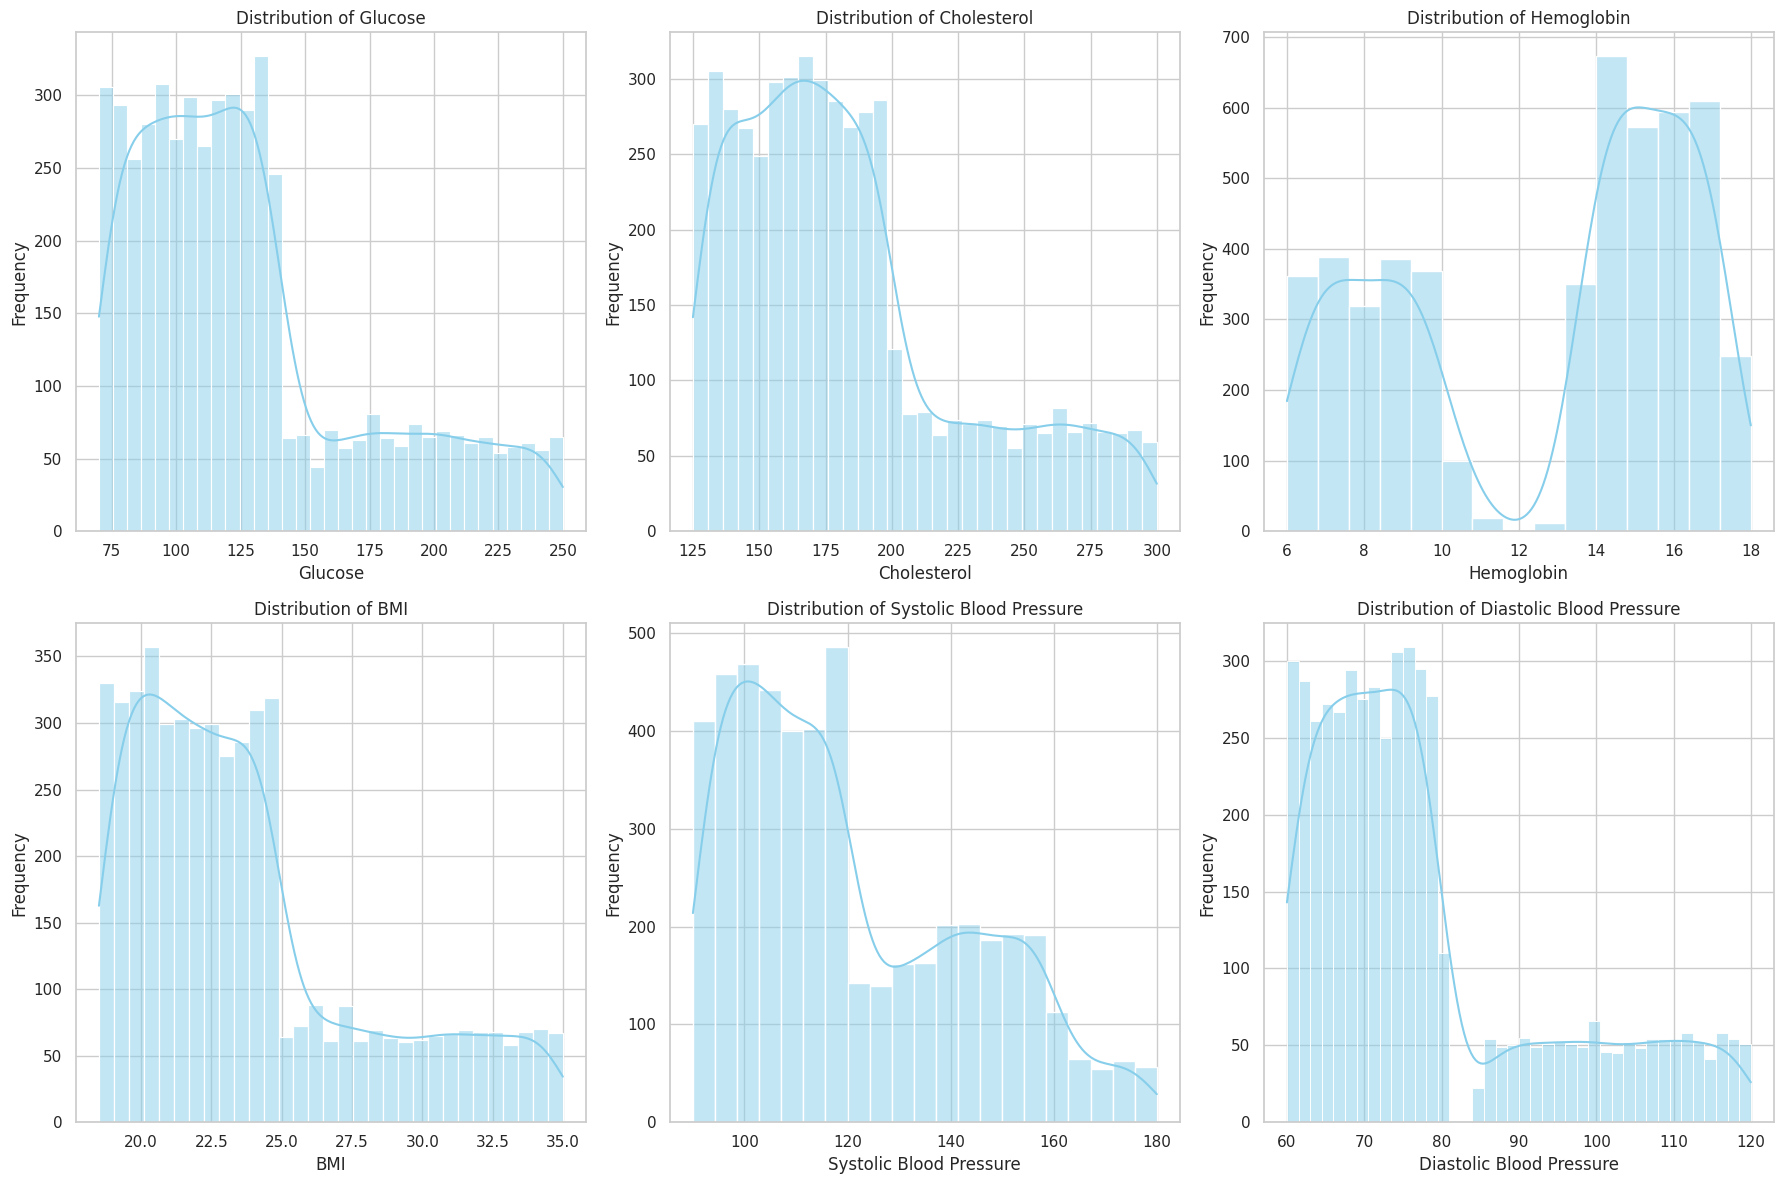

In [ ]:
# 1. Distribution of Key Columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(data_sample[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Correlation Heatmap**

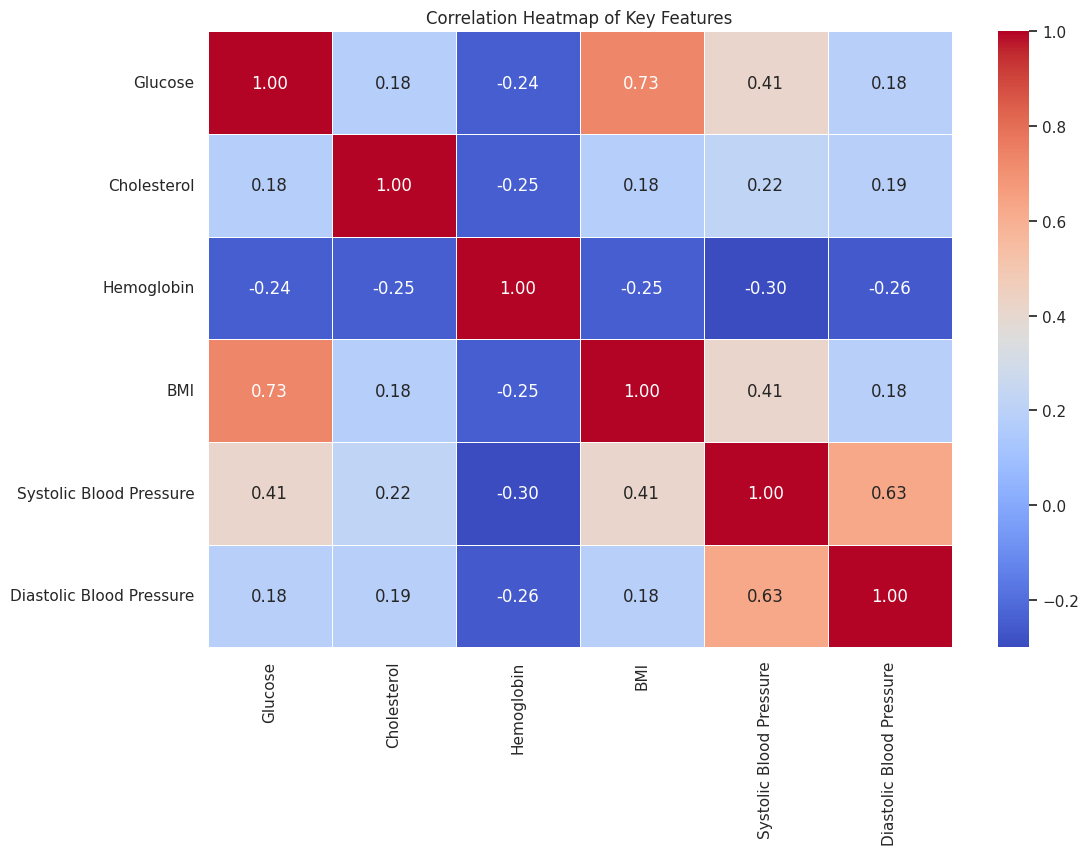

In [ ]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[columns_to_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Features")
plt.show()

# **Boxplot**

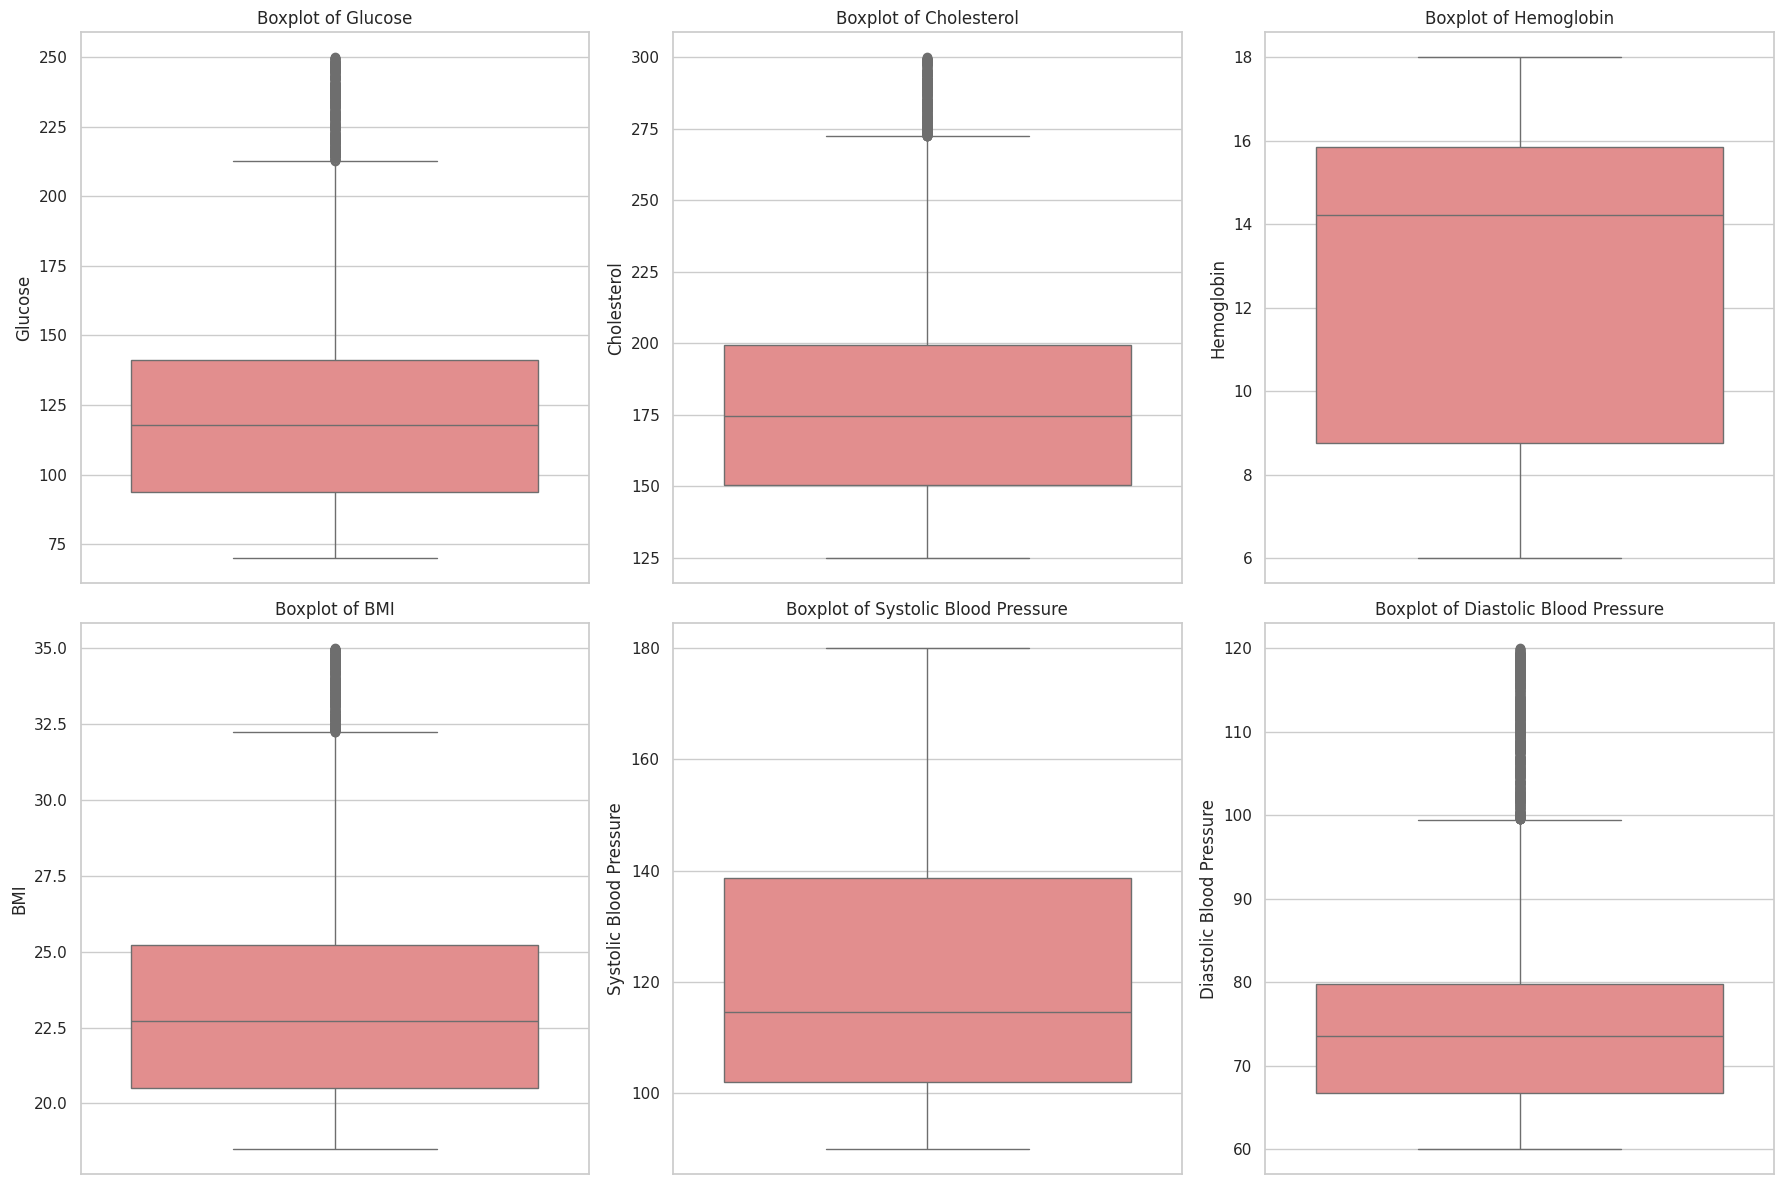

In [ ]:
# 3. Boxplots for Outlier Detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=data_sample[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# **Pie Chart**

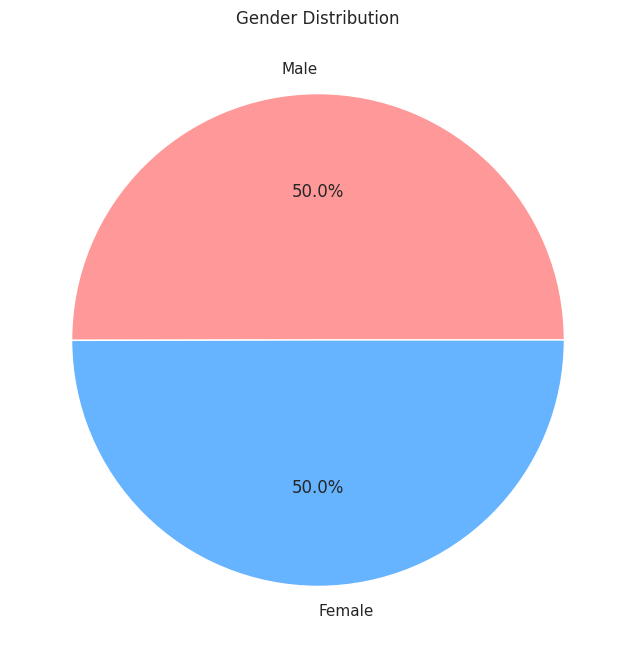

In [ ]:
# 4. Pie Chart for Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

# **Line Chart**

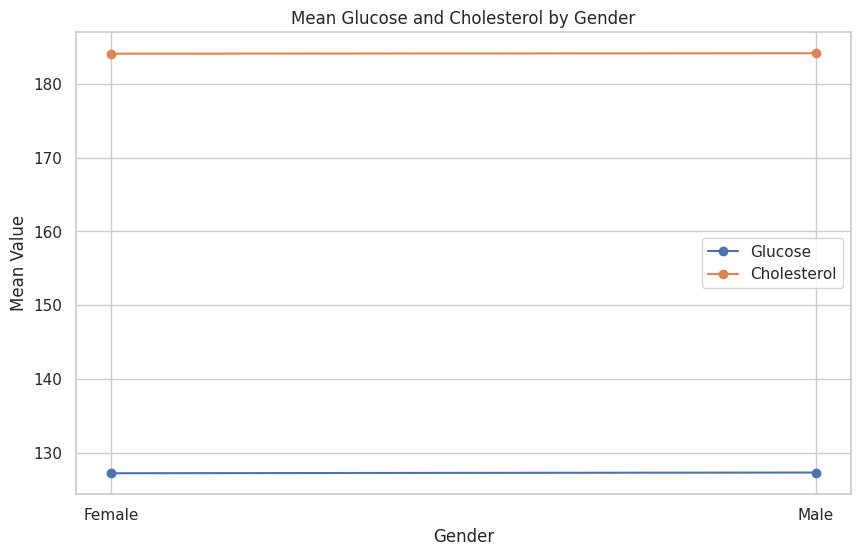

In [ ]:
# 5. Line Chart of Mean Glucose and Cholesterol by Gender
gender_summary = df.groupby('Gender')[['Glucose', 'Cholesterol']].mean().reset_index()
plt.figure(figsize=(10, 6))
for col in ['Glucose', 'Cholesterol']:
    plt.plot(gender_summary['Gender'], gender_summary[col], marker='o', label=col)
plt.title('Mean Glucose and Cholesterol by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Value')
plt.legend()
plt.show()


# **Bar Chart**

<ipython-input-15-e15b2b94dc79>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_diseases.index, x=top_diseases.values, palette="muted")


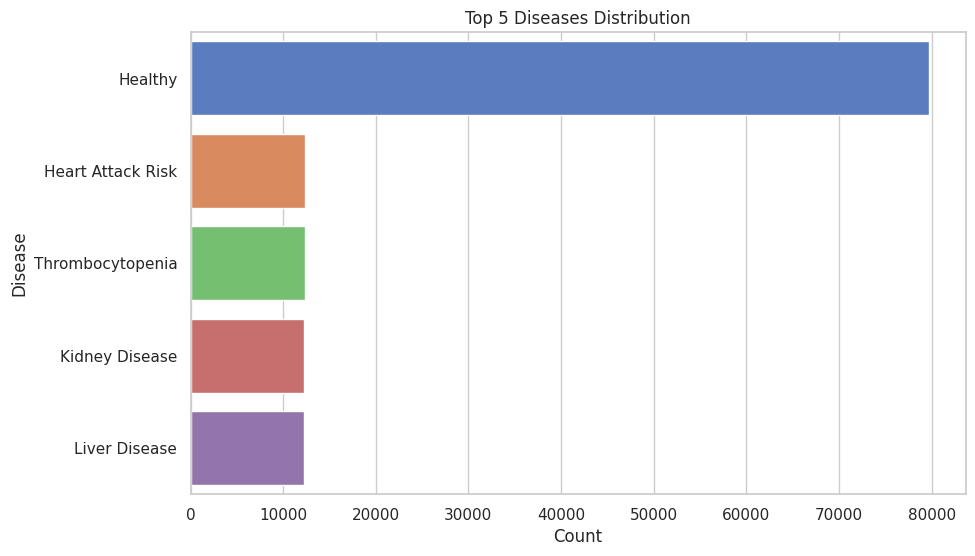

In [ ]:
# 6. Disease-wise Bar Chart
top_diseases = df['Disease'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_diseases.index, x=top_diseases.values, palette="muted")
plt.title('Top 5 Diseases Distribution')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.show()

# **Pair Plot**

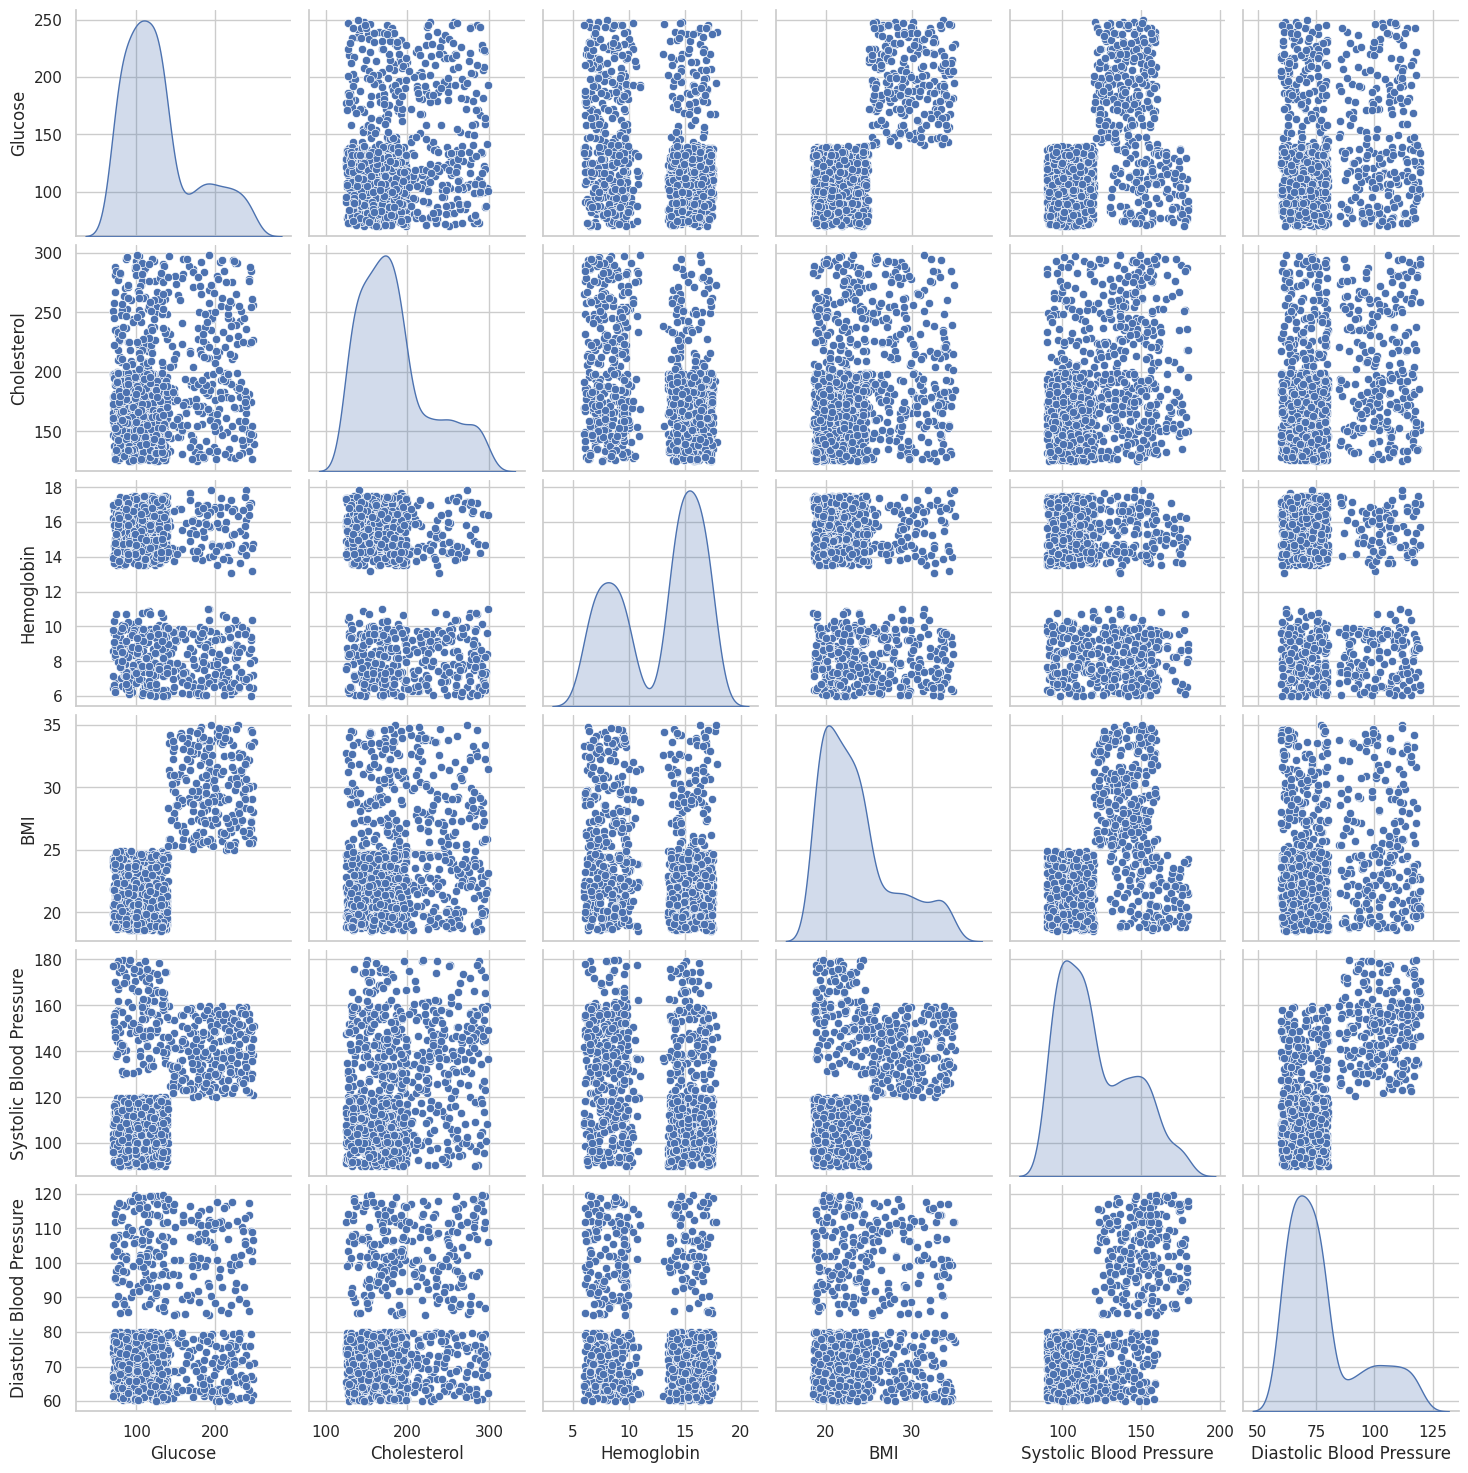

In [ ]:
# 7. Pair Plot for Key Features
sns.pairplot(data_sample[columns_to_plot].sample(1000, random_state=42), diag_kind='kde')
plt.show()


# **Violin Plot**

<ipython-input-26-609f79ab9696>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Hemoglobin', data=df, palette='muted')


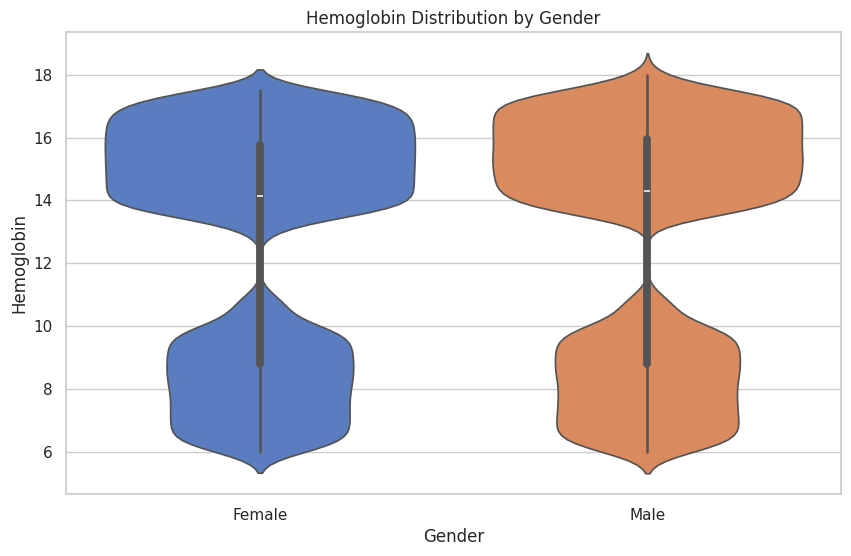

In [ ]:
# 8. Violin Plot for Hemoglobin Distribution by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Hemoglobin', data=df, palette='muted')
plt.title('Hemoglobin Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Hemoglobin')
plt.show()

# **Histogram**

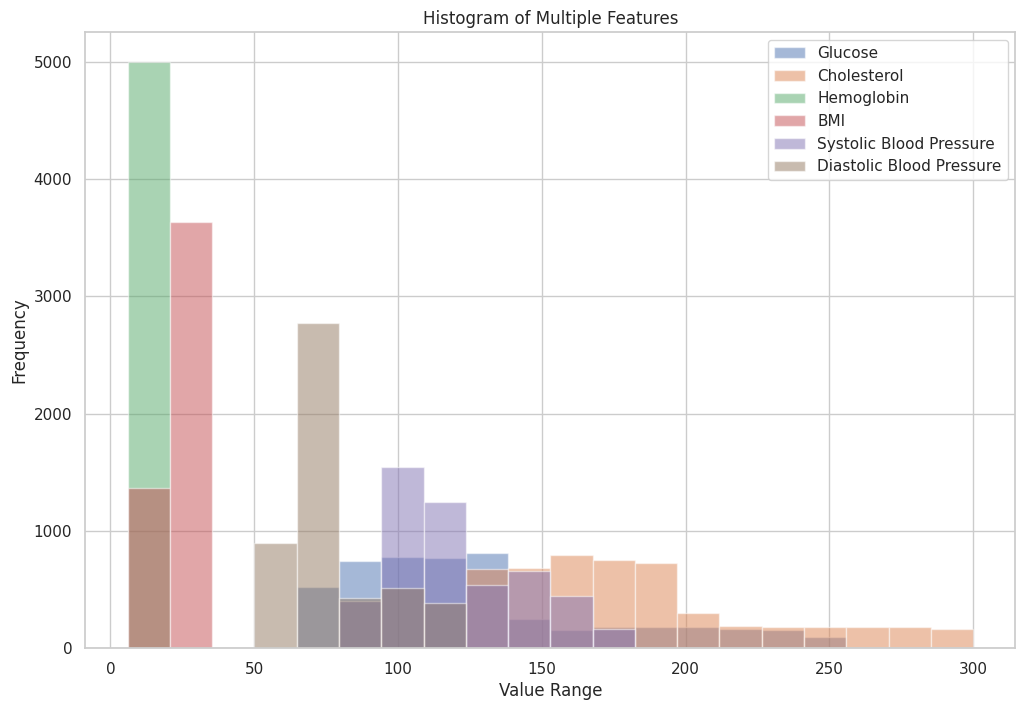

In [ ]:
# 9. Histogram with Multiple Features
data_sample[columns_to_plot].plot(kind='hist', alpha=0.5, bins=20, figsize=(12, 8))
plt.title('Histogram of Multiple Features')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.legend(columns_to_plot)
plt.show()

# **Bar Chart**

<ipython-input-31-957b01d5a6a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=glucose_by_disease.values, y=glucose_by_disease.index, palette='coolwarm')


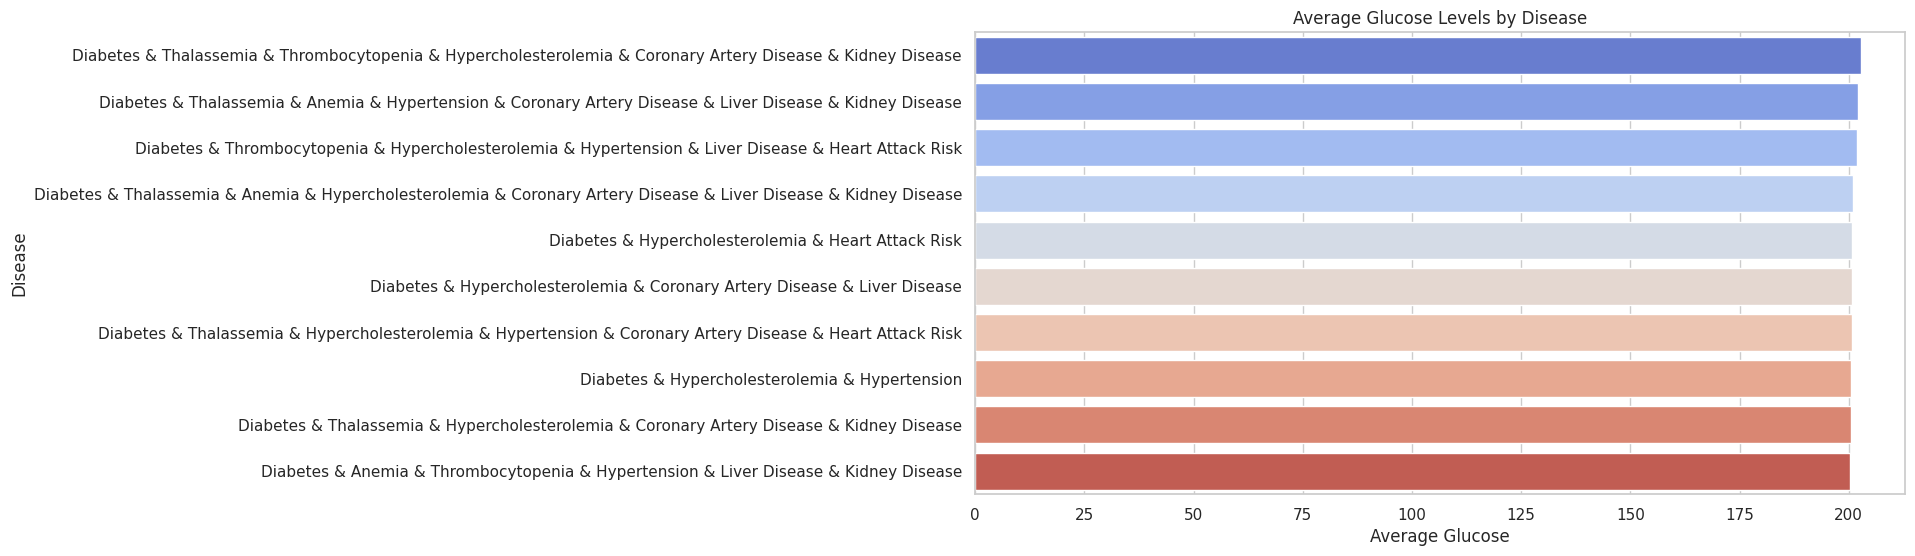

In [ ]:
# 10. Bar Chart of Average Glucose by Disease
glucose_by_disease = df.groupby('Disease')['Glucose'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=glucose_by_disease.values, y=glucose_by_disease.index, palette='coolwarm')
plt.title('Average Glucose Levels by Disease')
plt.xlabel('Average Glucose')
plt.ylabel('Disease')
plt.show()